In [ ]:
!pip install openpyxl
import pandas as pd
df = pd.read_csv('/content/salesforcourse-4fe2kehu.csv')
print(df.head())

   index       Date    Year     Month  Customer Age Customer Gender  \
0      0  2/19/2016  2016.0  February          29.0               F   
1      1  2/20/2016  2016.0  February          29.0               F   
2      2  2/27/2016  2016.0  February          29.0               F   
3      3  3/12/2016  2016.0     March          29.0               F   
4      4  3/12/2016  2016.0     March          29.0               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  Column1  
0      80.00  109.000000   80.0    109.0      NaN  
1      24.50

In [ ]:
# Column names and types
print(df.info())

# Summary stats for numeric columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [ ]:
#checking null values
print(df.isnull().sum())

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64


In [ ]:
# Drop duplicate rows
print(df.drop_duplicates(inplace=True))

None


In [ ]:
#delete column index
df.drop(columns='index', inplace=True, errors='ignore')

In [ ]:
#delete column Column1
df.drop(columns='Column1', inplace=True, errors='ignore')

In [ ]:
# Create Age Group
bins = [0, 25, 35, 50, 100]
labels = ['<25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)
print(df['Age Group'])

0        26-35
1        26-35
2        26-35
3        26-35
4        26-35
         ...  
34862    36-50
34863    36-50
34864    36-50
34865    36-50
34866      NaN
Name: Age Group, Length: 34867, dtype: category
Categories (4, object): ['<25' < '26-35' < '36-50' < '50+']


In [ ]:
import numpy as np

# Mean, median, std of Revenue
print("Mean Revenue:", np.mean(df['Revenue']))
print("Median Revenue:", np.median(df['Revenue']))
print("Standard Deviation:", np.std(df['Revenue']))

# Correlation matrix
print("\nCorrelation:")
print(df[['Revenue', 'Cost', 'Profit']].corr())

Mean Revenue: 640.8700929846273
Median Revenue: 319.0
Standard Deviation: 736.6294695941899

Correlation:
          Revenue      Cost    Profit
Revenue  1.000000  0.979119  0.396183
Cost     0.979119  1.000000  0.201258
Profit   0.396183  0.201258  1.000000


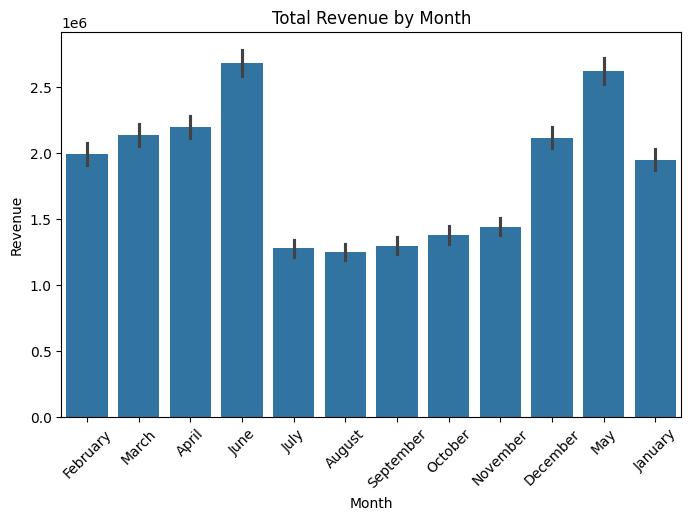

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Revenue by Month
plt.figure(figsize=(8,5))
sns.barplot(x='Month', y='Revenue', data=df, estimator=sum)
plt.title("Total Revenue by Month")
plt.xticks(rotation=45)
plt.show()

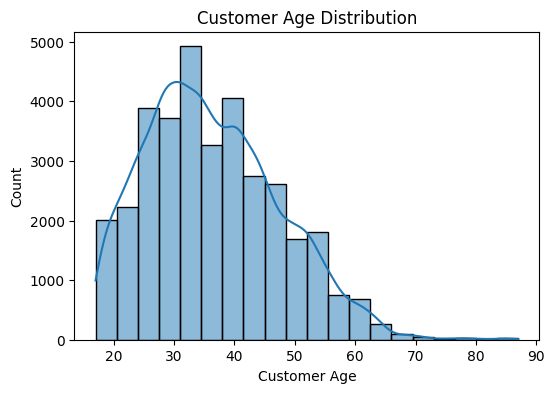

In [ ]:
# Distribution of Customer Age
plt.figure(figsize=(6,4))
sns.histplot(df['Customer Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()

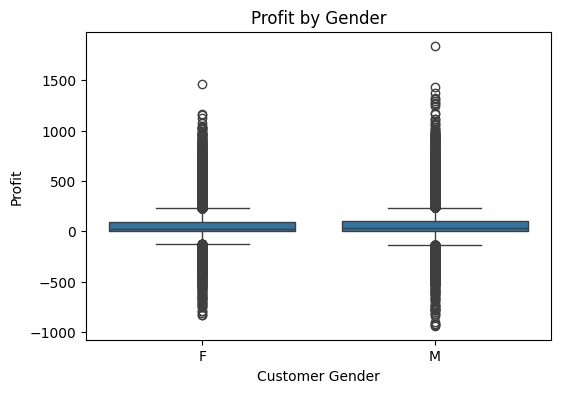

In [ ]:
# Profit by Gender
plt.figure(figsize=(6,4))
sns.boxplot(x='Customer Gender', y='Profit', data=df)
plt.title("Profit by Gender")
plt.show()

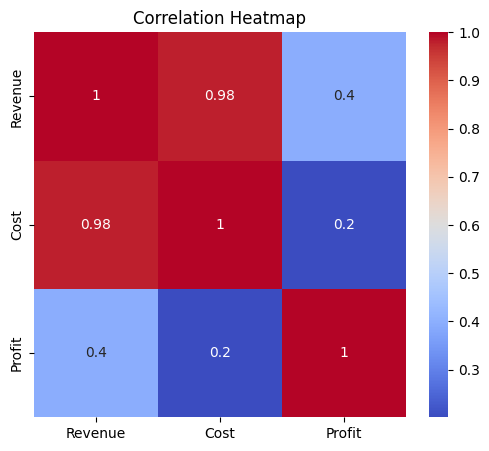

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['Revenue', 'Cost', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#What is the average revenue per transaction?
avg_revenue = df['Revenue'].mean()
print("Average Revenue per Transaction:", round(avg_revenue, 2))

Average Revenue per Transaction: 640.87


In [ ]:
#Which month generated the most revenue?
monthly_revenue = df.groupby('Month')['Revenue'].sum().sort_values(ascending=False)
print("Month with Highest Revenue:", monthly_revenue.idxmax())

Month with Highest Revenue: June


Gender Distribution:
Customer Gender
M    17805
F    17061
Name: count, dtype: int64


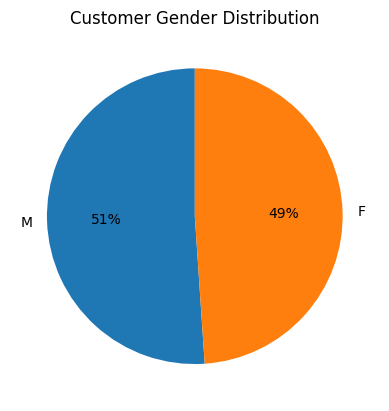

In [ ]:
#What is the gender distribution of customers?
print("Gender Distribution:")
print(df['Customer Gender'].value_counts())

import matplotlib.pyplot as plt
df['Customer Gender'].value_counts().plot.pie(autopct='%1.0f%%', startangle=90)
plt.title("Customer Gender Distribution")
plt.ylabel("")
plt.show()

In [ ]:
#Does age impact revenue per transaction?
df['Revenue per Transaction'] = df['Revenue']
age_revenue = df.groupby('Age Group')['Revenue per Transaction'].mean()
print(age_revenue)

Age Group
<25      516.963792
26-35    678.863690
36-50    673.924701
50+      613.663074
Name: Revenue per Transaction, dtype: float64


<ipython-input-56-1243135010>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_revenue = df.groupby('Age Group')['Revenue per Transaction'].mean()


In [ ]:
#What is the profit margin across categories?
df['Profit Margin'] = df['Profit'] / df['Revenue']
category_margin = df.groupby('Product Category')['Profit Margin'].mean().sort_values(ascending=False)
print("Profit Margin by Category:")
print(category_margin)

Profit Margin by Category:
Product Category
Accessories    0.169803
Clothing       0.147987
Bikes          0.010304
Name: Profit Margin, dtype: float64
